# Attendance Tool

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 1000)

In [2]:
roster = pd.read_csv("blackboard-roster.csv", index_col=False)

In [3]:
roster['Name'] = roster['First Name'] + " " + roster['Last Name']

In [4]:
zoom = pd.read_csv("participants_91515764698 (1) (1).csv", index_col=False)

In [5]:
# Use in case of non @syr.edu email addresses
#zoom_temp = zoom['Name (Original Name)'].str.extract(r'^(?P<First>\S+).*?(?P<Last>\S+)?$')
#zoom['Name'] = zoom_temp['First'] + " " + zoom_temp['Last']
#zoom['Name'] = zoom['Name'].str.replace('([()])', '')

In [6]:
zoom_temp = zoom['User Email'].str.split("@")
zoom['Name'] = [i[0] for i in zoom_temp]

In [7]:
attending = []
for name in roster['Username']:
    if name in list(zoom['Name']):
        attending.append(True)
    else:
        attending.append(False)

In [8]:
attendance = pd.DataFrame()
attendance['Name'] = roster['Name']
attendance['Username'] = roster['Username']
attendance['Present'] = attending

In [9]:
polling = pd.read_csv("2021_spring_ist256_m001_mafudge_2021-04-12_15-45-00.csv", index_col=False)

In [10]:
poll_temp = polling['userId'].str.split("@")
polling['userId'] = [i[0] for i in poll_temp]

In [11]:
participants = pd.DataFrame(polling.groupby(['userId'], as_index=False)['response'].count())
participants['>=50%'] = participants['response'] >= participants['response'].max()/2 

In [12]:
import numpy as np
merged = attendance.merge(participants, how='outer', left_on='Username', right_on='userId')
merged['Response'] = merged['response']
merged.loc[np.isnan(merged.Response),'Response']=0.0
merged.loc[(merged.Response == 0.0),'>=50%']=False
merged = merged.drop(columns=['userId', 'response'])

In [13]:
good_participation = merged['>=50%'].value_counts()
good_attendance = merged['Present'].value_counts()
response = merged['Response'].value_counts()

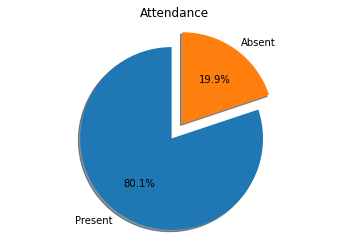

In [14]:
import matplotlib.pyplot as plt

labels = 'Present', 'Absent'
sizes = good_attendance
explode = (0.1, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Attendance')

plt.show()

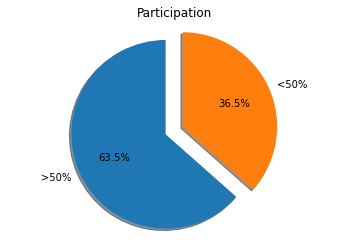

In [15]:
labels = '>50%', '<50%'
sizes = good_participation
explode = (0.1, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Participation')

plt.show()

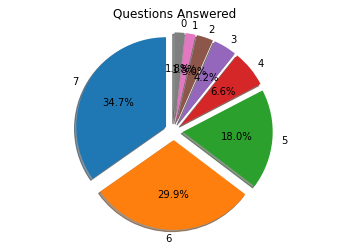

In [16]:
labels = '7', '6', '5', '4', '3', '2', '1', '0'
sizes = response
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Questions Answered')

plt.show()

In [17]:
def attendance(blackboard_roster, zoom_participants, poll_participants):
    roster = pd.read_csv(blackboard_roster, index_col=False)
    roster['Name'] = roster['First Name'] + " " + roster['Last Name']
 
    zoom = pd.read_csv(zoom_participants, index_col=False)
    
    # Use in case of non @syr.edu email addresses
    #zoom_temp = zoom['Name (Original Name)'].str.extract(r'^(?P<First>\S+).*?(?P<Last>\S+)?$')
    #zoom['Name'] = zoom_temp['First'] + " " + zoom_temp['Last']
    #zoom['Name'] = zoom['Name'].str.replace('([()])', '')
    
    zoom_temp = zoom['User Email'].str.split("@")
    zoom['Name'] = [i[0] for i in zoom_temp]
    
    attending = []
    for name in roster['Name']:
        if name in list(zoom['Name']):
            attending.append(True)
        else:
            attending.append(False)
            
    attendance = pd.DataFrame()
    attendance['Name'] = roster['Name']
    attendance['Username'] = roster['Username']
    attendance['Present'] = attending
    
    polling = pd.read_csv(poll_participants, index_col=False)
    poll_temp = polling['userId'].str.split("@")
    polling['userId'] = [i[0] for i in poll_temp]
    
    participants = pd.DataFrame(polling.groupby(['userId'], as_index=False)['response'].count())
    participants['>=50%'] = participants['response'] >= participants['response'].max()/2 
    
    merged = attendance.merge(participants, how='outer', left_on='Username', right_on='userId')
    merged['Response'] = merged['response']
    merged.loc[np.isnan(merged.Response),'Response']=0.0
    merged.loc[(merged.Response == 0.0),'>=50%']=False
    merged = merged.drop(columns=['userId', 'response'])
    
    return merged

In [18]:
#attendance("blackboard-roster.csv", "participants_91515764698 (1) (1).csv", "2021_spring_ist256_m001_mafudge_2021-04-12_15-45-00.csv")

In [19]:
#merged.to_csv('attendance_2021_4_12.csv')